## Course Reccomendation System 

In [1]:
from __future__ import annotations # To prevent Subscript for class "list" will generate runtime exception; enclose type annotation in quotes
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import random
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import scipy
from sklearn.preprocessing import MinMaxScaler
from Kmeans import * 
%matplotlib inline

In [2]:
random_state = 42

#### Applying Pre-processing steps on data: 


In [3]:
df=pd.read_excel('Course Recommendation System.xlsx')
df=df.drop(['ID','Start time','Completion time','Email','Name','Name(not mandatory)\n' ], axis=1)
df['mean'] = df.mean(axis=0,skipna=True,numeric_only=True)
df = df.apply(lambda x : x.fillna(x.mean(skipna=True)),axis=0)
df.drop(axis="columns",labels=["mean"],inplace=True)
df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.620098,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.600000,0.423286,0.396622,0.510897
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.200000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.500000,0.423286,0.396622,0.510897
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.800000,0.900000,1.000000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.400000,0.423286,0.396622,0.510897
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.750000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.800000,0.452708,0.423286,0.800000,0.510897
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.400000,0.400000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.700000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.000000,0.423286,0.396622,0.510897
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.000000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.200000
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.500000,0.400000,0.200000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,1.000000,0.423286,0.396622,1.000000
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,0.620098,0.572638,0.700000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.510897


In [4]:
df.loc[90]

Data Structures and Algorithms                                1.0
Computer Architecture\n                                       1.0
Discrete Mathematics\n                                        1.0
Economics                                                     0.0
Programming-2                                                 1.0
Machine Learning\n                                            1.0
Mathematics For Machine Learning\n                            1.0
Visual Recognition\n                                          1.0
Natural Language Processing\n                                 1.0
Reinforcement Learning                                        1.0
Software Production Engineering\n                             1.0
Computer Graphics\n                                           1.0
Data Visualization\n                                          1.0
Programming Languages\n                                       1.0
Cloud Computing\n                                             1.0
Digital CM

In [5]:
df_wm = df['The Web and the Mind ']
df_sorted = df_wm.sort_values( ascending=False)

In [6]:
df_sorted = np.array(df_sorted)

In [7]:
df_sorted[26]

0.75

In [8]:
df.columns

Index(['Data Structures and Algorithms', 'Computer Architecture\n',
       'Discrete Mathematics\n', 'Economics', 'Programming-2',
       'Machine Learning\n', 'Mathematics For Machine Learning\n',
       'Visual Recognition\n', 'Natural Language Processing\n',
       'Reinforcement Learning', 'Software Production Engineering\n',
       'Computer Graphics\n', 'Data Visualization\n',
       'Programming Languages\n', 'Cloud Computing\n',
       'Digital CMOS VLSI Design ', 'System design with FPGA ', 'ASIC design ',
       'VLSI Architecture Design\n',
       'High level synthesis and optimization of Digital Circuits ',
       'Digital Sociology ', 'Privacy in the Digital Age',
       'Technology Ethics and AI ', 'Techno-economics of networks ',
       'The Web and the Mind '],
      dtype='object')

In [9]:
def cluster_to_matrix(X_train,y_train,num_cluster):
    k=Kmeans(K=num_cluster,iter=150,p=2,random_state=random_state)
    y_pred,centroids=k.predict(np.array(X_train),choice=0)
    k.centroids=np.array(centroids)
    empty_cluster = []
    for idx,i in enumerate(k.clusters):
        if len(i)==0:
            empty_cluster.append(idx)

    X_train2 = pd.concat([X_train,y_train,pd.DataFrame(y_pred,columns=["label"],dtype='int')],axis="columns")
    df_cluster_rep = X_train2.groupby(['label'], as_index=False).mean()
    df_cluster_rep.drop(labels="label",axis="columns",inplace=True)
    matrix = df_cluster_rep.to_numpy()
    final_matrix = []
    j = 0 
    for i in range(num_cluster):
        if i in empty_cluster:
            final_matrix.append(np.zeros(25))
        else:
            final_matrix.append(matrix[j])
            j+=1

    return np.array(final_matrix),k 

Performing the task on dataset 

In [10]:
X = df[[df.columns[0],df.columns[1],df.columns[2],df.columns[3],df.columns[4]]]
y = df.drop(labels=["Data Structures and Algorithms","Computer Architecture\n","Discrete Mathematics\n","Economics","Programming-2"],axis="columns")

In [11]:
X

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2
0,0.30,0.85,0.85,0.90,0.70
1,0.70,0.80,0.20,0.80,0.80
2,0.70,0.00,1.00,1.00,1.00
3,0.65,0.70,0.20,0.75,0.75
4,0.70,0.60,0.20,0.00,0.80
...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60
158,1.00,0.00,0.00,0.70,0.70
159,0.60,0.30,0.40,0.90,0.80
160,0.80,0.60,0.20,0.40,0.70


In [12]:
y

,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,Software Production Engineering\n,Computer Graphics\n,Data Visualization\n,Programming Languages\n,Cloud Computing\n,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.70,0.80,0.620098,0.572638,0.603495,0.675943,0.456217,0.58841,0.543363,0.572587,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.600000,0.423286,0.396622,0.510897
1,0.50,0.10,0.200000,0.572638,0.603495,0.675943,0.800000,0.58841,0.543363,0.572587,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.500000,0.423286,0.396622,0.510897
2,1.00,1.00,0.800000,0.900000,1.000000,0.000000,0.600000,0.00000,0.000000,0.000000,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.400000,0.423286,0.396622,0.510897
3,0.75,0.75,0.750000,0.572638,0.603495,0.300000,0.200000,0.58841,0.600000,0.572587,0.251538,0.246316,0.214805,0.234868,0.168056,0.800000,0.452708,0.423286,0.800000,0.510897
4,0.50,0.60,0.400000,0.400000,0.200000,0.700000,0.200000,0.20000,0.500000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.50,0.30,0.700000,0.572638,0.603495,0.675943,0.000000,0.58841,0.543363,0.572587,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.000000,0.423286,0.396622,0.510897
158,0.00,0.00,0.000000,0.572638,0.603495,0.500000,1.000000,1.00000,0.000000,0.572587,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.200000
159,0.70,0.40,0.500000,0.400000,0.200000,0.700000,0.700000,0.70000,0.700000,0.800000,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,1.000000,0.423286,0.396622,1.000000
160,0.70,0.80,0.620098,0.572638,0.700000,0.400000,0.400000,0.58841,0.600000,0.572587,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.510897


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05, shuffle=True,random_state=random_state)

In [14]:
matrix,kmeans_model = cluster_to_matrix(X_train,y_train,8)

In [15]:
matrix

array([[0.77743947, 0.6895    , 0.59953923, 0.59320881, 0.86579796,
        0.80915302, 0.73684492, 0.65039914, 0.59657487, 0.65739057,
        0.64830975, 0.49684393, 0.64835402, 0.60851032, 0.61463668,
        0.30615385, 0.28003509, 0.2268961 , 0.29001096, 0.19636574,
        0.30011261, 0.48297561, 0.41474762, 0.40636261, 0.53237179],
       [0.86666667, 0.85833333, 0.87083333, 0.70833333, 0.8375    ,
        0.79388707, 0.7616958 , 0.48169918, 0.51965241, 0.60203901,
        0.62963836, 0.48175706, 0.6201708 , 0.51334808, 0.47191125,
        0.16769231, 0.18473684, 0.1611039 , 0.17615132, 0.12604167,
        0.33716216, 0.40180553, 0.42385714, 0.34746622, 0.54059829],
       [0.72      , 0.54      , 0.54      , 0.58      , 0.82      ,
        0.64133224, 0.46451748, 0.49401951, 0.44905526, 0.36139817,
        0.67037736, 0.37124339, 0.45536397, 0.68867257, 0.6490348 ,
        0.20061538, 0.19852632, 0.14592208, 0.15394737, 0.16722222,
        0.2272973 , 0.41054166, 0.40931429, 0.

In [16]:
matrix.shape

(8, 25)

In [17]:
from SVD import * 
u,s,sigma,V_trans = ReducedSVD(matrix,2)

In [18]:
matrix_clean = u@sigma@V_trans
matrix_clean = matrix_clean.astype('float')

In [19]:
def predict(datapoint,kmeans,matrix_clean):
    ''' 
        @input: Takes in a datapoint, kmeans object, and information matrix 
        @output: Returns: rating sorted with index for column name mapping
    '''
    y_pred = kmeans.predictPoint(datapoint)
    inferred_full = matrix_clean[y_pred]
    inferred = inferred_full[5:]
    sorted_ratings = []
    for idx,element in enumerate(inferred):
        sorted_ratings.append([element,idx+5])
    sorted_ratings.sort()
    sorted_ratings.reverse()
    return sorted_ratings 

In [20]:
X_test.shape

(9, 5)

In [21]:
y_test

,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,Software Production Engineering\n,Computer Graphics\n,Data Visualization\n,Programming Languages\n,Cloud Computing\n,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
158,0.00,0.0,0.000000,0.572638,0.603495,0.5,1.000000,1.00000,0.000000,0.572587,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.200000
109,0.75,0.8,0.620098,0.572638,0.603495,1.0,0.456217,0.58841,0.543363,0.572587,0.500000,1.000000,0.700000,0.500000,0.168056,0.318243,0.452708,0.423286,0.396622,0.510897
131,0.60,0.7,0.700000,0.500000,0.600000,0.7,0.700000,0.70000,0.800000,0.750000,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.900000,0.510897
55,1.00,1.0,1.000000,0.572638,0.603495,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
94,1.00,1.0,0.600000,0.800000,1.000000,1.0,0.200000,0.70000,0.500000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.600000
29,1.00,1.0,0.000000,0.000000,0.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
101,1.00,1.0,1.000000,0.500000,0.500000,0.8,0.300000,0.90000,0.800000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.300000
51,1.00,1.0,1.000000,1.000000,1.000000,0.5,0.700000,0.50000,1.000000,0.500000,0.500000,0.500000,0.400000,0.200000,0.300000,0.400000,0.500000,1.000000,0.300000,1.000000
100,1.00,1.0,1.000000,0.000000,0.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Trying Prediction on a sample data point from test set 

In [22]:
X_test.to_numpy()[0][:5]

array([1. , 0. , 0. , 0.7, 0.7])

In [23]:
sorted_ratings = predict(X_test.to_numpy()[0][:5],kmeans_model,matrix_clean)

In [24]:
s="Top 5 PREDICTED recommended electives are:\n"
for i in range(5):
    s+=df.columns[sorted_ratings[i][1]]+"\n"
print(s)

Top 5 PREDICTED recommended electives are:
Machine Learning

Mathematics For Machine Learning

Software Production Engineering

Visual Recognition

Reinforcement Learning



Comparing sample with the actual top 5

In [25]:
sorted_ratings = []
inferred = y_test.to_numpy()[1]
for idx,element in enumerate(inferred):
    sorted_ratings.append([element,idx+5])
sorted_ratings.sort()
sorted_ratings.reverse()

s="Top 5 ACTUAL recommended electives are:\n"
for i in range(5):
    s+=df.columns[sorted_ratings[i][1]]+"\n"
print(s)

Top 5 ACTUAL recommended electives are:
System design with FPGA 
Software Production Engineering

Mathematics For Machine Learning

Machine Learning

ASIC design 



In [26]:
X_test.shape

(9, 5)

### Functions for whole test series application 

In [27]:
def predict_for_dataset(X_test,kmeans_instance,matrix_clean):
    ''' Runs out inference and return predicted ratings of subjects 
        @input: X_test,kmeans object, clean_matrix after SVD
    '''
    X_test = X_test.to_numpy()
    y_pred = []
    for i in range(X_test.shape[0]):
        datapoint =X_test[i][:5]
        y_pred.append(predict(datapoint,kmeans_instance,matrix_clean))
    return np.array(y_pred)

In [28]:
y_pred = predict_for_dataset(X_test,kmeans_model,matrix_clean) 

In [29]:
y_pred.shape

(9, 20, 2)

In [30]:
def accuracy(y_pred,y_test,n=5):
    ''' Finds out % common subject in top 5 rated subjects (predicted and actual) 
        @input: predicted values and test dataset values 
        @output: accuracy value 
    '''
    y_test = y_test.to_numpy()
    sorted_ratings_actual = []
    for i in range(y_test.shape[0]):
        inferred = y_test[i]
        t = []
        for idx,element in enumerate(inferred):
            t.append([element,idx+5])
        t.sort()
        t.reverse()
        sorted_ratings_actual.append(np.array(t))
    sorted_ratings_actual = np.array(sorted_ratings_actual)
    
    total = 0 
    correct = 0 

    
    for i in range(len(sorted_ratings_actual)):
        total+=5
        temp = sorted_ratings_actual[i][:n]
        # if i ==1:
        #     print(temp)
        for j in range(n):
            for k in range(len(temp)):
                if(y_pred[i][j][1]==temp[k][1]):correct+=1

    perecent_correct_for_datapoint = []

    for i in range(len(sorted_ratings_actual)):
        per_correct = 0 
        temp = sorted_ratings_actual[i][:n]
        # if i ==1:
        #     print(temp)
        for j in range(n):
            for k in range(len(temp)):
                if(y_pred[i][j][1]==temp[k][1]):per_correct+=1
        perecent_correct_for_datapoint.append(per_correct/n)
    print("Total Entries received: ", len(sorted_ratings_actual)*n," Total Correct: ",correct)
    return 100*(correct/total),perecent_correct_for_datapoint,sorted_ratings_actual
        

In [31]:
overall_val,per_point_val,y_sorted_actual = accuracy(y_pred,y_test)

Total Entries received:  45  Total Correct:  23


In [32]:
overall_val

51.11111111111111

In [33]:
per_point_val

[0.2, 0.6, 0.0, 0.8, 0.8, 0.6, 0.6, 0.2, 0.8]

In [34]:
def display_subject(sorted_ratings,names,num_recs=5):
    '''
        @input: sorted_ratings list 
        @output: Names of subject corresponding
    '''
    s=""
    for i in range(num_recs):
        s+=names[int(sorted_ratings[i][1])]+"\n"
    return s 

In [35]:
print(display_subject(y_pred[1],df.columns))

Machine Learning

Mathematics For Machine Learning

Software Production Engineering

Visual Recognition

Reinforcement Learning



In [36]:
print(display_subject(y_sorted_actual[1],df.columns))

System design with FPGA 
Software Production Engineering

Mathematics For Machine Learning

Machine Learning

ASIC design 



#### Accuracy Vs K 

Total Entries received:  765  Total Correct:  399
Total Entries received:  765  Total Correct:  378
Total Entries received:  765  Total Correct:  367
Total Entries received:  765  Total Correct:  356
Total Entries received:  765  Total Correct:  351
Total Entries received:  765  Total Correct:  348
Total Entries received:  765  Total Correct:  348
Total Entries received:  765  Total Correct:  361
Total Entries received:  765  Total Correct:  354
Total Entries received:  765  Total Correct:  379
Total Entries received:  765  Total Correct:  361
Total Entries received:  765  Total Correct:  371
Total Entries received:  765  Total Correct:  336
Total Entries received:  765  Total Correct:  321


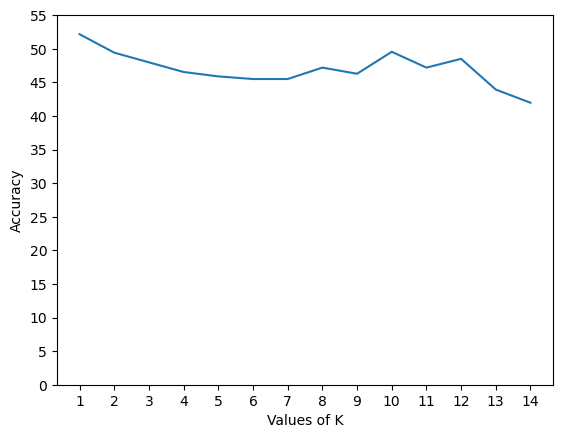

In [37]:
accuracy_list = []
k = range(1,15)
y_ticks = range(0,60)
for i in range(1,15):
    matrix,kmeans_object=cluster_to_matrix(X_train,y_train,i)
    u,s,sigma,V_trans = ReducedSVD(matrix,to_remove=0)
    matrix_clean = u@sigma@V_trans
    matrix_clean = matrix_clean.astype('float')
    y_pred = predict_for_dataset(X_train,kmeans_object,matrix_clean)
    overall_val,per_point_val,y_sorted_actual = accuracy(y_pred,y_train)
    accuracy_list.append(overall_val)
plt.plot(k,accuracy_list)
plt.xlabel('Values of K')
plt.ylabel('Accuracy')
plt.xticks(np.arange(min(k), max(k)+1, 1.0))
plt.yticks(np.arange(min(y_ticks),max(y_ticks)+1,5.0))
plt.show()

In [38]:
list_df = pd.DataFrame(list(k),columns=["Values of K"])
acc_df = pd.DataFrame(accuracy_list,columns=["Accuracy"])
to_show = pd.concat([list_df,acc_df],axis="columns")

In [39]:
to_show

,Values of K,Accuracy
0,1,52.156863
1,2,49.411765
2,3,47.973856
3,4,46.535948
4,5,45.882353
5,6,45.490196
6,7,45.490196
7,8,47.189542
8,9,46.274510
9,10,49.542484


#### Reduced SVD Analysis

Total Entries received:  765  Total Correct:  379
Total Entries received:  765  Total Correct:  378
Total Entries received:  765  Total Correct:  377
Total Entries received:  765  Total Correct:  379
Total Entries received:  765  Total Correct:  380
Total Entries received:  765  Total Correct:  379
Total Entries received:  765  Total Correct:  393
Total Entries received:  765  Total Correct:  399


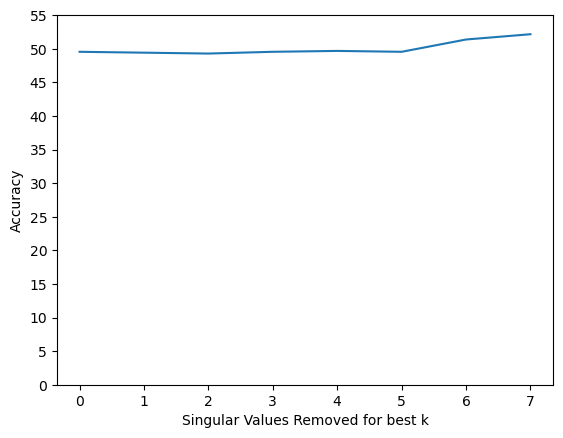

In [40]:
accuracy_list = []
k = range(0,8)
y_ticks = range(0,60)
for i in range(0,8):
    matrix,kmeans_object=cluster_to_matrix(X_train,y_train,10)
    u,s,sigma,V_trans = ReducedSVD(matrix,to_remove=i)
    matrix_clean = u@sigma@V_trans
    matrix_clean = matrix_clean.astype('float')
    y_pred = predict_for_dataset(X_train,kmeans_object,matrix_clean)
    overall_val,per_point_val,y_sorted_actual = accuracy(y_pred,y_train)
    accuracy_list.append(overall_val)
plt.plot(k,accuracy_list)
plt.xlabel('Singular Values Removed for best k')
plt.ylabel('Accuracy')
plt.xticks(np.arange(min(k), max(k)+1, 1.0))
plt.yticks(np.arange(min(y_ticks),max(y_ticks)+1,5.0))
plt.show()

In [41]:
accuracy_list

[49.54248366013072,
 49.411764705882355,
 49.28104575163399,
 49.54248366013072,
 49.673202614379086,
 49.54248366013072,
 51.37254901960784,
 52.156862745098046]

In [42]:
list_df = pd.DataFrame(list(k),columns=["Removed values"])
acc_df = pd.DataFrame(accuracy_list,columns=["Accuracy"])
to_show = pd.concat([list_df,acc_df],axis="columns")
to_show

,Removed values,Accuracy
0,0,49.542484
1,1,49.411765
2,2,49.281046
3,3,49.542484
4,4,49.673203
5,5,49.542484
6,6,51.372549
7,7,52.156863


#### Mean Absolute Error Analysis:

In [43]:
def predict_unsorted(datapoint,kmeans,matrix_clean):
    ''' 
        @input: Takes in a datapoint, kmeans object, and information matrix 
        @output: Returns: rating not-sorted i.e in order of subjects and not ratings 
    '''
    y_pred = kmeans.predictPoint(datapoint)
    inferred_full = matrix_clean[y_pred]
    inferred = inferred_full[5:]
    sorted_ratings = []
    for idx,element in enumerate(inferred):
        sorted_ratings.append(element)
    # sorted_ratings.sort()
    # sorted_ratings.reverse()
    return sorted_ratings 

In [44]:
def predict_for_dataset_unsorted(X_test,kmeans_instance,matrix_clean):
    ''' Runs out inference and return predicted ratings of subjects 
        @input: X_test,kmeans object, clean_matrix after SVD
    '''
    X_test = X_test.to_numpy()
    y_pred = []
    for i in range(X_test.shape[0]):
        datapoint =X_test[i][:5]
        y_pred.append(predict_unsorted(datapoint,kmeans_instance,matrix_clean))
    return np.array(y_pred)

trial on K=10

In [45]:
matrix,kmeans_object=cluster_to_matrix(X_train,y_train,10)
u,s,sigma,V_trans = ReducedSVD(matrix,to_remove=i)
matrix_clean = u@sigma@V_trans
matrix_clean = matrix_clean.astype('float')
y_pred = predict_for_dataset_unsorted(X_train,kmeans_object,matrix_clean)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, y_pred)
print(mae)


0.42679298237560986


MAE VS K 

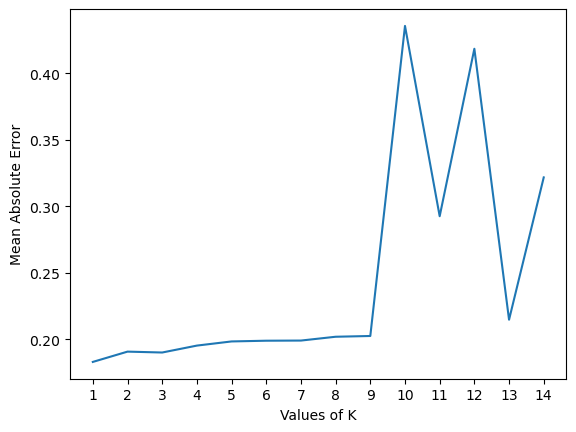

In [46]:
mae_list = []
k = range(1,15)
# y_ticks = range(0,60)
for i in range(1,15):
    matrix,kmeans_object=cluster_to_matrix(X_train,y_train,i)
    u,s,sigma,V_trans = ReducedSVD(matrix,to_remove=0)
    matrix_clean = u@sigma@V_trans
    matrix_clean = matrix_clean.astype('float')
    y_pred = predict_for_dataset_unsorted(X_train,kmeans_object,matrix_clean)
    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(y_train, y_pred)
    mae_list.append(mae)
plt.plot(k,mae_list)
plt.xlabel('Values of K')
plt.ylabel('Mean Absolute Error')
plt.xticks(np.arange(min(k), max(k)+1, 1.0))
# plt.yticks(np.arange(min(y_ticks),max(y_ticks)+1,5.0))
plt.show()

In [47]:
list_df = pd.DataFrame(list(k),columns=["Values of K"])
acc_df = pd.DataFrame(mae_list,columns=["Mean Absolute Error"])
to_show = pd.concat([list_df,acc_df],axis="columns")
to_show

,Values of K,Mean Absolute Error
0,1,0.183020
1,2,0.190758
2,3,0.190090
3,4,0.195289
4,5,0.198413
5,6,0.198957
6,7,0.199071
7,8,0.201933
8,9,0.202508
9,10,0.435482


MAE vs Reduced SVD 

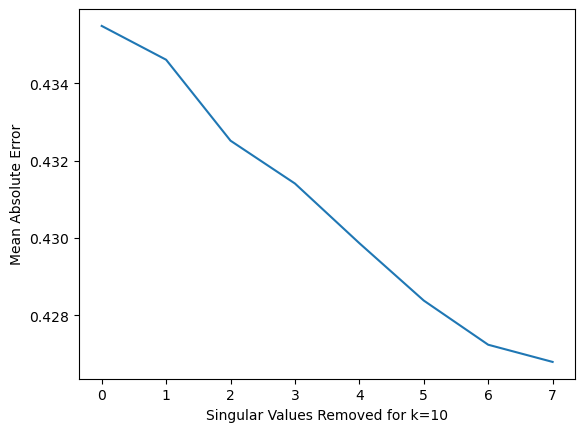

In [48]:
mae_list = []
k = range(0,8)

for i in range(0,8):
    matrix,kmeans_object=cluster_to_matrix(X_train,y_train,10)
    u,s,sigma,V_trans = ReducedSVD(matrix,to_remove=i)
    matrix_clean = u@sigma@V_trans
    matrix_clean = matrix_clean.astype('float')
    y_pred = predict_for_dataset_unsorted(X_train,kmeans_object,matrix_clean)
    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(y_train, y_pred)
    mae_list.append(mae)

plt.plot(k,mae_list)
plt.xlabel('Singular Values Removed for k=10')
plt.ylabel('Mean Absolute Error')
plt.xticks(np.arange(min(k), max(k)+1, 1.0))
plt.show()

In [49]:
list_df = pd.DataFrame(list(k),columns=["Singular Values Removed"])
acc_df = pd.DataFrame(mae_list,columns=["Mean Absolute Error"])
to_show = pd.concat([list_df,acc_df],axis="columns")
to_show

,Singular Values Removed,Mean Absolute Error
0,0,0.435482
1,1,0.434608
2,2,0.432514
3,3,0.431406
4,4,0.429863
5,5,0.428380
6,6,0.427238
7,7,0.426793


#### Cross Validation
We take values of cluster from 4 to 14 and go on removing 0 to k-1 singular values and try to find the best accuracy (cause the recommendations can be explained better with what you recommend)

In [50]:
accuracy_list_gs = []
def grid_search(X_train,y_train):
    for i in range(4,15):
        for j in range(0,i):
            try:
                matrix,kmeans_object=cluster_to_matrix(X_train,y_train,i)
                u,s,sigma,V_trans = ReducedSVD(matrix,to_remove=j)
                matrix_clean = u@sigma@V_trans
                matrix_clean = matrix_clean.astype('float')
                y_pred = predict_for_dataset(X_train,kmeans_object,matrix_clean)
                overall_val,per_point_val,y_sorted_actual = accuracy(y_pred,y_train)
                accuracy_list_gs.append([overall_val,('Number of cluster',i),('SV removed',j)])
            except: 
                print(i,j,"index_error")
    accuracy_list_gs.sort(reverse=True)
grid_search(X_train,y_train)

Total Entries received:  765  Total Correct:  356
Total Entries received:  765  Total Correct:  367
Total Entries received:  765  Total Correct:  372
Total Entries received:  765  Total Correct:  399
Total Entries received:  765  Total Correct:  351
Total Entries received:  765  Total Correct:  369
Total Entries received:  765  Total Correct:  385
Total Entries received:  765  Total Correct:  385
Total Entries received:  765  Total Correct:  399
Total Entries received:  765  Total Correct:  348
Total Entries received:  765  Total Correct:  362
Total Entries received:  765  Total Correct:  359
Total Entries received:  765  Total Correct:  378
Total Entries received:  765  Total Correct:  386
Total Entries received:  765  Total Correct:  374
Total Entries received:  765  Total Correct:  348
Total Entries received:  765  Total Correct:  355
Total Entries received:  765  Total Correct:  358
Total Entries received:  765  Total Correct:  363
Total Entries received:  765  Total Correct:  366


In [51]:
accuracy_list_gs

[[52.156862745098046, ('Number of cluster', 14), ('SV removed', 12)],
 [52.156862745098046, ('Number of cluster', 13), ('SV removed', 11)],
 [52.156862745098046, ('Number of cluster', 12), ('SV removed', 10)],
 [52.156862745098046, ('Number of cluster', 12), ('SV removed', 9)],
 [52.156862745098046, ('Number of cluster', 11), ('SV removed', 9)],
 [52.156862745098046, ('Number of cluster', 10), ('SV removed', 8)],
 [52.156862745098046, ('Number of cluster', 10), ('SV removed', 7)],
 [52.156862745098046, ('Number of cluster', 9), ('SV removed', 7)],
 [52.156862745098046, ('Number of cluster', 8), ('SV removed', 6)],
 [52.156862745098046, ('Number of cluster', 5), ('SV removed', 4)],
 [52.156862745098046, ('Number of cluster', 4), ('SV removed', 3)],
 [51.37254901960784, ('Number of cluster', 10), ('SV removed', 6)],
 [51.24183006535947, ('Number of cluster', 13), ('SV removed', 10)],
 [51.24183006535947, ('Number of cluster', 12), ('SV removed', 8)],
 [50.588235294117645, ('Number of clu

### PCA for visualisation
Keeping k = 10 

In [52]:
# colors = ['red','blue','green','purple','yellow','orange','pink','gray','brown','cyan']

In [53]:
colors = {0: 'red', 1: 'blue', 2:'green' ,3:'purple',4:'yellow',5:'orange',6:'magenta',7:'gray',8:'brown',9:'cyan'}

In [54]:
from sklearn.decomposition import PCA
k=Kmeans(K=10,iter=150,p=2,random_state=42)
y_pred,_=k.predict(np.array(X_train),choice=0)
k.centroids=np.array(k.centroids, dtype='int')
X_train2 = pd.concat([X_train,y_train],axis="columns")
labels = pd.DataFrame(y_pred,columns=["label"],dtype='int')
X_train2.reset_index(inplace=True)
labels.reset_index(inplace=True)
X_train2=pd.concat([X_train2,labels],axis=1)
X_train2


,index,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,...,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind,index,label
0,144,1.0,0.7,1.0,0.5,1.0,1.0,1.0,1.000000,0.000000,...,0.500000,0.800000,1.000000,0.500000,0.000000,0.000000,0.300000,0.000000,0,0
1,19,0.8,0.8,0.8,0.5,0.8,0.9,0.9,0.620098,0.572638,...,0.214805,0.234868,0.168056,0.318243,0.300000,0.423286,0.396622,0.510897,1,0
2,84,1.0,0.5,0.0,0.0,1.0,1.0,1.0,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.318243,0.452708,0.423286,0.396622,1.000000,2,7
3,15,0.7,0.9,0.2,0.6,1.0,1.0,0.8,0.700000,0.572638,...,0.214805,0.234868,0.168056,0.318243,0.600000,0.423286,0.396622,0.510897,3,9
4,66,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.318243,0.452708,0.423286,0.396622,0.510897,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,71,0.5,0.5,0.0,1.0,0.6,0.7,0.6,0.700000,0.572638,...,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.510897,148,8
149,106,0.5,0.8,0.4,0.9,0.7,1.0,0.8,0.900000,0.600000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.500000,0.700000,149,1
150,14,0.8,0.6,0.9,0.9,0.7,0.8,0.5,0.750000,0.572638,...,0.214805,0.234868,0.168056,0.318243,0.400000,0.423286,0.396622,0.510897,150,0
151,92,1.0,1.0,1.0,0.7,1.0,0.7,0.9,0.500000,0.572638,...,0.214805,0.234868,0.168056,0.500000,0.452708,0.423286,0.396622,0.700000,151,0


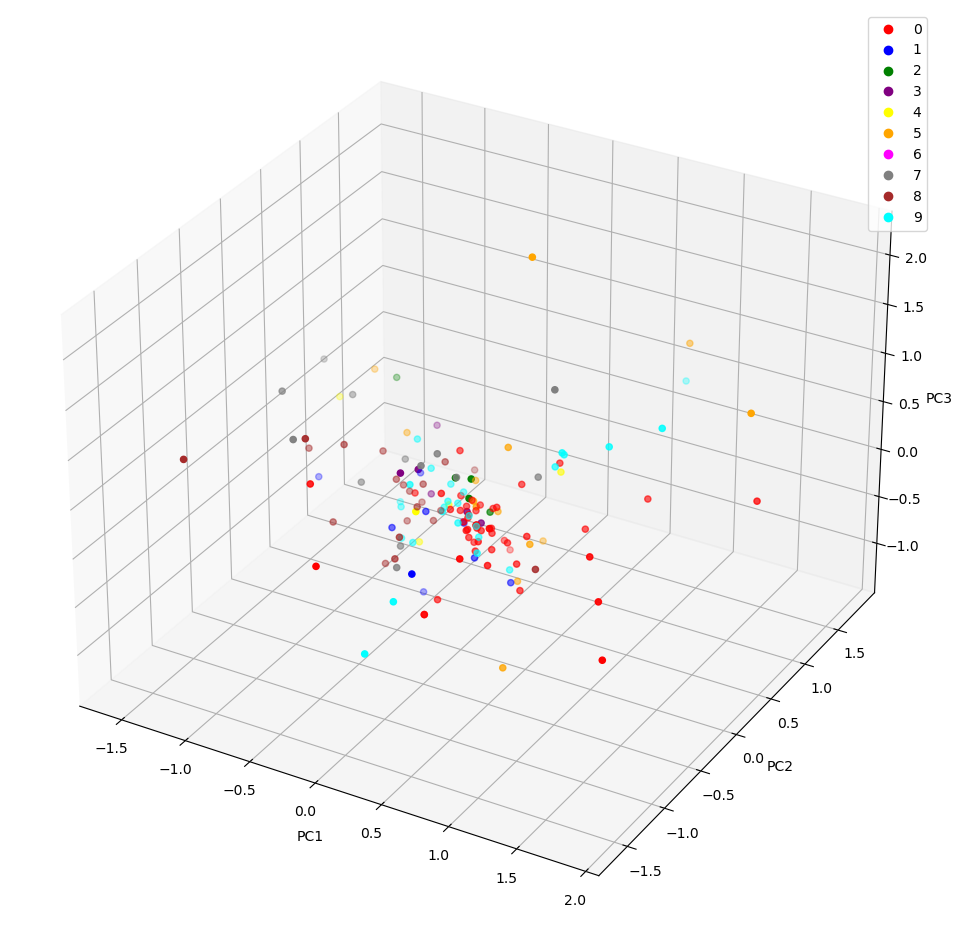

In [55]:
labels = X_train2['label']
features = X_train2.drop(['label','index'], axis="columns")
pca = PCA(n_components=3)
principal_components = pca.fit_transform(features)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
for label in labels.unique():
    indices = labels == label
    x = principal_components[indices, 0]
    y = principal_components[indices, 1]
    z = principal_components[indices, 2]
    c = colors[label]

    ax.scatter(x, y, z, c=c, label=label)

sorted_labels = sorted(labels.unique(), key=lambda x: colors[x])

handles = [plt.plot([], [], color=colors[label], marker='o', ls='', label=label)[0] for label in colors.keys()]
ax.legend(handles=handles)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

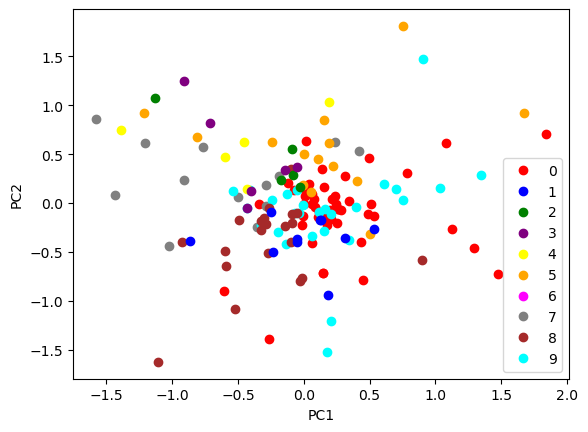

In [56]:
labels = X_train2['label']
features = X_train2.drop(['label','index'], axis="columns")
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

fig, ax = plt.subplots()
for label in labels.unique():
    indices = labels == label
    x = principal_components[indices, 0]
    y = principal_components[indices, 1]
    c = colors[label]
    ax.scatter(x, y, c=c, label=label)

sorted_labels = sorted(labels.unique(), key=lambda x: colors[x])

handles = [plt.plot([], [], color=colors[label], marker='o', ls='', label=label)[0] for label in colors.keys()]
ax.legend(handles=handles)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

In [57]:
cl = np.array(k.clusters)
count_arr = []
for idx,i in enumerate(cl):
    count_arr.append([idx,len(i)])
count_arr
df_count = pd.DataFrame(count_arr,columns=["Cluster Number","Number of points in it"])
df_count 

/var/folders/d3/cp13q0jn14z64vh0k61msh680000gn/T/ipykernel_15115/2765835443.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cl = np.array(k.clusters)


,Cluster Number,Number of points in it
0,0,52
1,1,10
2,2,5
3,3,6
4,4,5
5,5,14
6,6,0
7,7,13
8,8,21
9,9,27


#### Top Subjects for Each Cluster 

In [58]:
subjects = ["Data Structures and Algorithms","Computer Architecture","Discrete Mathematics","Economics","Programming-2",
       'Machine Learning', 'Mathematics For Machine Learning',
       'Visual Recognition', 'Natural Language Processing',
       'Reinforcement Learning', 'Software Production Engineering',
       'Computer Graphics', 'Data Visualization',
       'Programming Languages', 'Cloud Computing',
       'Digital CMOS VLSI Design ', 'System design with FPGA ', 'ASIC design ',
       'VLSI Architecture Design',
       'High level synthesis and optimization of Digital Circuits',
       'Digital Sociology ', 'Privacy in the Digital Age',
       'Technology Ethics and AI ', 'Techno-economics of networks ',
       'The Web and the Mind']

In [59]:
matrix,kmeans_model=cluster_to_matrix(X_train,y_train,10)
u,s,sigma,V_trans = ReducedSVD(matrix,to_remove=5)
matrix_clean = u@sigma@V_trans
matrix_clean = matrix_clean.astype('float')
vals = []
for i in range(matrix_clean.shape[0]):
    mat = matrix_clean[i][5:]
    sorted_ratings = []
    for idx,element in enumerate(mat):
        sorted_ratings.append([element,idx+5])
    sorted_ratings.sort()
    sorted_ratings.reverse()
    vals.append(sorted_ratings)
for i in range(len(vals)):
    print(i)
    print(display_subject(vals[i],subjects,5) )


0
Machine Learning
Mathematics For Machine Learning
Software Production Engineering
Visual Recognition
Reinforcement Learning

1
Machine Learning
Mathematics For Machine Learning
Software Production Engineering
Reinforcement Learning
Natural Language Processing

2
Machine Learning
Software Production Engineering
Mathematics For Machine Learning
Cloud Computing
Programming Languages

3
Machine Learning
Mathematics For Machine Learning
Privacy in the Digital Age
The Web and the Mind
Data Visualization

4
Machine Learning
Mathematics For Machine Learning
Software Production Engineering
Reinforcement Learning
Natural Language Processing

5
Machine Learning
Software Production Engineering
Mathematics For Machine Learning
Cloud Computing
Visual Recognition

6
The Web and the Mind
Techno-economics of networks 
Technology Ethics and AI 
Privacy in the Digital Age
Digital Sociology 

7
Machine Learning
Mathematics For Machine Learning
Reinforcement Learning
Natural Language Processing
Software 

#### UI for easy testing and prediction 

In [60]:
!pip install gradio
import gradio as gr

In [ ]:
text = ["Data Structures and Algorithms","Computer Architecture","Discrete Mathematics","Economics","Programming-2",
       'Machine Learning', 'Mathematics For Machine Learning',
       'Visual Recognition', 'Natural Language Processing',
       'Reinforcement Learning', 'Software Production Engineering',
       'Computer Graphics', 'Data Visualization',
       'Programming Languages', 'Cloud Computing',
       'Digital CMOS VLSI Design ', 'System design with FPGA ', 'ASIC design ',
       'VLSI Architecture Design',
       'High level synthesis and optimization of Digital Circuits',
       'Digital Sociology ', 'Privacy in the Digital Age',
       'Technology Ethics and AI ', 'Techno-economics of networks ',
       'The Web and the Mind ']
def ui(name,num_recs,c1,c2,c3,c4,c5):
    core = np.array([c1,c2,c3,c4,c5])
    matrix,kmeans_model=cluster_to_matrix(X_train,y_train,10)
    print("Allocated Cluster:" ,kmeans_model.predictPoint(core))
    u,s,sigma,V_trans = ReducedSVD(matrix,to_remove=5)
    matrix_clean = u@sigma@V_trans
    matrix_clean = matrix_clean.astype('float')
    subjects=predict(core,kmeans_model,matrix_clean)
    return display_subject(subjects,text,num_recs)
    
    
    
demo = gr.Interface(fn=ui, inputs=[gr.Text(label="Enter your Name (Optional)"),
                                      gr.Slider(int(1),int(20),step=1,label="Number of subjects you want us to recommend?"),
                                      gr.Slider(0,1,label="Data Structures and Algorithms",info="Enter a value between 0 and 1"),
                                      gr.Slider(0,1,label="Computer Architecture",info="Enter a value between 0 and 1"),
                                      gr.Slider(0,1,label="Discrete Mathematics",info="Enter a value between 0 and 1"),
                                      gr.Slider(0,1,label="Economics",info="Enter a value between 0 and 1"),
                                      gr.Slider(0,1,label="Programming-2",info="Enter a value between 0 and 1")], 
                                    outputs=gr.Text(label="Here are your recommendations:(in decreasing order/ preference) "))

demo.launch(share=True) 